In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plot we will create

#Read in dat
df = pd.read_csv(r'C:\Users\user\Downloads\GoHire Data Cleaned 2d.csv')

In [2]:
# Lets look at the data 

df.head()

,SN,Timestamp,Name,Where is the shift done?,Shift Type,Date of Shift,Start Time,End Time,Shifts Hours Covered
0,1,8:02:42 PM,Staff 90,Omega - Site 7,Day,"Monday, August 30, 2021",14:30,22:00,7:30
1,2,8:21:31 PM,Ajiboye,Omega - Site 6,Day,"Wednesday, October 20, 2021",7:30,22:00,14:30
2,3,8:24:34 PM,Ajiboye,Omega - Site 6,Day,"Monday, January 10, 2022",7:30,22:00,14:30
3,4,8:26:55 PM,Ajiboye,Omega - Site 6,Day,"Tuesday, February 1, 2022",7:30,22:00,14:30
4,5,11:16:36 PM,Staff 18,Omega - Site 3,Day,"Saturday, February 5, 2022",7:30,15:00,7:30


In [3]:
#Drop 'SN' and 'Timestamp' column

df = df.drop('SN', axis=1)
df = df.drop('Timestamp', axis=1)

In [35]:
#Lets look at data types

df.dtypes

 Name                        object
Where is the shift done?     object
Shift Type                   object
Date of Shift                object
Start Time                   object
End Time                     object
Shifts Hours Covered        float64
Year                        float64
Month                       float64
Day                         float64
dtype: object

In [4]:
#Changing data types

df['Shifts Hours Covered'] = df['Shifts Hours Covered'].str.replace(':', '.').astype('float64')
df['Date of Shift'] = pd.to_datetime(df['Date of Shift'])

In [32]:
#Split the 'Date of Shift' column into 'Day' 'Month' and 'year'

df['Date of Shift'] = df['Date of Shift'].astype(str)


df[['Year', 'Month', 'Day']] = df['Date of Shift'].astype(str).str.split('-', expand=True)




In [33]:
df

,Name,Where is the shift done?,Shift Type,Date of Shift,Start Time,End Time,Shifts Hours Covered,Year,Month,Day
0,Staff 90,Omega - Site 7,Day,2021-08-30,14:30,22:00,7.3,2021,08,30
1,Ajiboye,Omega - Site 6,Day,2021-10-20,7:30,22:00,14.3,2021,10,20
2,Ajiboye,Omega - Site 6,Day,2022-01-10,7:30,22:00,14.3,2022,01,10
3,Ajiboye,Omega - Site 6,Day,2022-02-01,7:30,22:00,14.3,2022,02,01
4,Staff 18,Omega - Site 3,Day,2022-02-05,7:30,15:00,7.3,2022,02,05
...,...,...,...,...,...,...,...,...,...,...
5655,Obayuwana,Omega - Site 24,Night,2022-09-06,22:00,7:00,15.0,2022,09,06
5656,Staff 65,Others,Day,2022-09-07,10:00,17:30,7.3,2022,09,07
5657,Staff 65,Others,Day,2022-09-07,10:00,17:30,7.3,2022,09,07
5658,Staff 62,Omega - Site 5,Day,2022-09-08,9:30,21:30,12.0,2022,09,08


In [36]:
#Changing data types

df['Day'] = df['Day'].astype('float64')
df['Month'] = df['Month'].astype('float64')
df['Year'] = df['Year'].astype('float64')



In [37]:
#Lookig at correlation 

df.corr()

,Shifts Hours Covered,Year,Month,Day
Shifts Hours Covered,1.000000,0.001586,-0.011575,0.030884
Year,0.001586,1.000000,0.018784,-0.028836
Month,-0.011575,0.018784,1.000000,-0.096339
Day,0.030884,-0.028836,-0.096339,1.000000


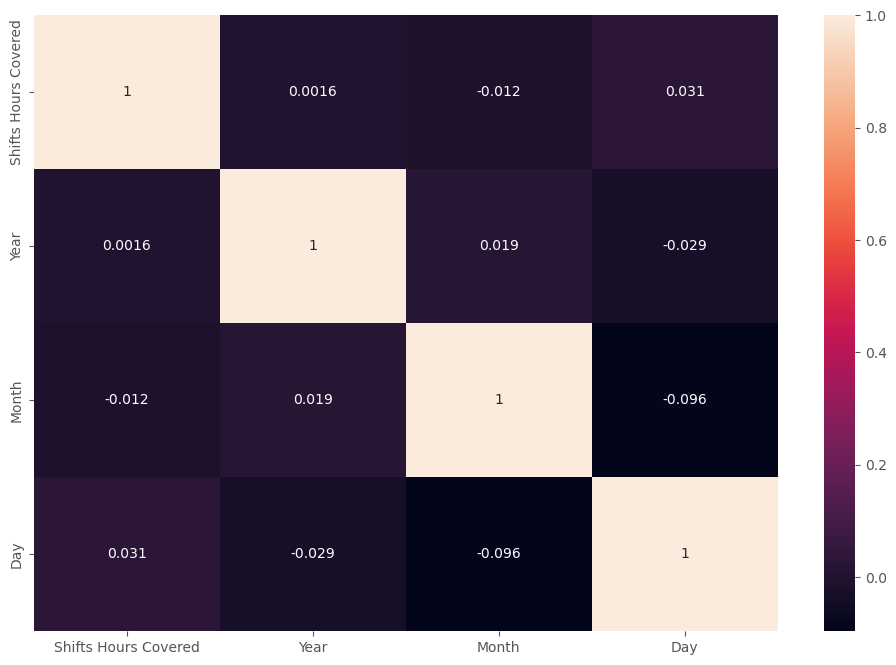

In [38]:
#Visualizing correlation matrix

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# My observation is the the shift covered has a high correlation with the day of shift, this means that Gohire gets more shift hours on certain days

In [39]:
#Numerizing the object data type columns 

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [40]:
df_numerized

,Name,Where is the shift done?,Shift Type,Date of Shift,Start Time,End Time,Shifts Hours Covered,Year,Month,Day
0,210,26,0,0,22,43,7.3,2021.0,8.0,30.0
1,18,25,0,2,84,43,14.3,2021.0,10.0,20.0
2,18,25,0,3,84,43,14.3,2022.0,1.0,10.0
3,18,25,0,4,84,43,14.3,2022.0,2.0,1.0
4,135,22,0,5,84,12,7.3,2022.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...
5655,106,20,1,216,55,56,15.0,2022.0,9.0,6.0
5656,182,29,0,217,2,19,7.3,2022.0,9.0,7.0
5657,182,29,0,217,2,19,7.3,2022.0,9.0,7.0
5658,179,24,0,218,101,40,12.0,2022.0,9.0,8.0


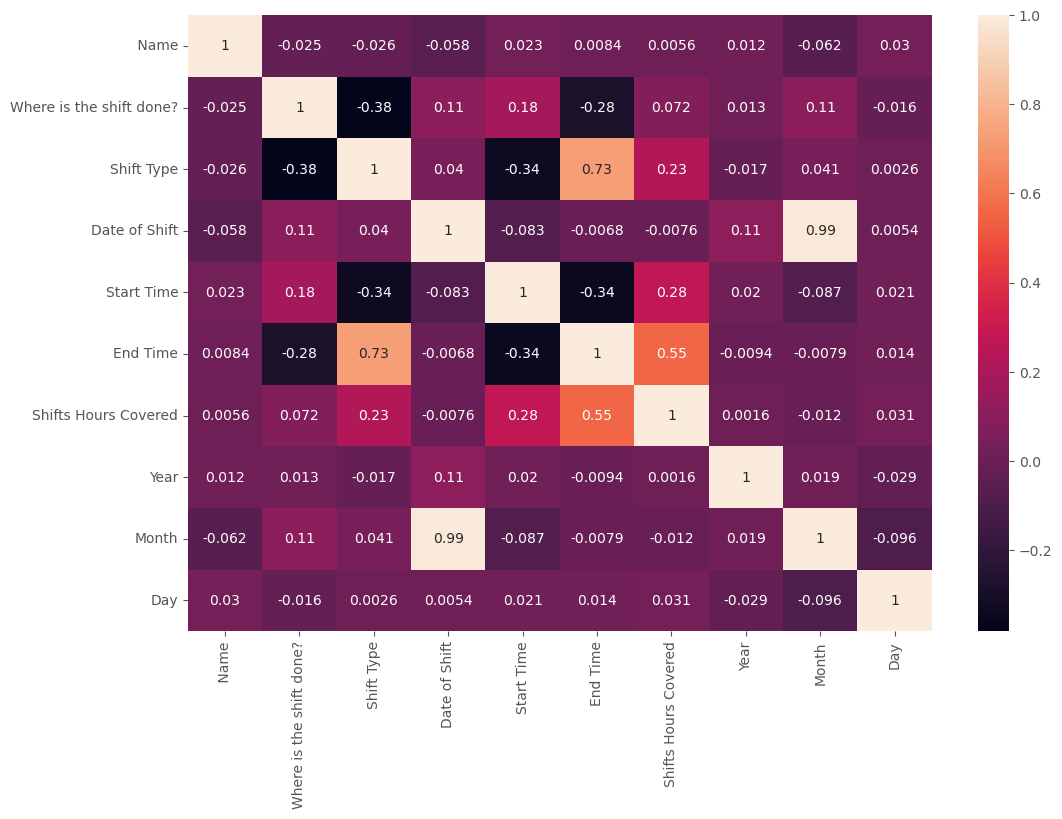

In [41]:
#Visualizing correlation matrix

correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [42]:
 df_numerized.corr()

,Name,Where is the shift done?,Shift Type,Date of Shift,Start Time,End Time,Shifts Hours Covered,Year,Month,Day
Name,1.000000,-0.024543,-0.026303,-0.057538,0.022857,0.008423,0.005583,0.012321,-0.061980,0.030165
Where is the shift done?,-0.024543,1.000000,-0.382326,0.108230,0.176185,-0.282219,0.071878,0.012784,0.108692,-0.015638
Shift Type,-0.026303,-0.382326,1.000000,0.039904,-0.336952,0.725226,0.227420,-0.016832,0.040747,0.002616
Date of Shift,-0.057538,0.108230,0.039904,1.000000,-0.083203,-0.006785,-0.007630,0.113953,0.988672,0.005404
Start Time,0.022857,0.176185,-0.336952,-0.083203,1.000000,-0.344088,0.276365,0.020146,-0.087183,0.020949
End Time,0.008423,-0.282219,0.725226,-0.006785,-0.344088,1.000000,0.552396,-0.009438,-0.007892,0.014357
Shifts Hours Covered,0.005583,0.071878,0.227420,-0.007630,0.276365,0.552396,1.000000,0.001586,-0.011575,0.030884
Year,0.012321,0.012784,-0.016832,0.113953,0.020146,-0.009438,0.001586,1.000000,0.018784,-0.028836
Month,-0.061980,0.108692,0.040747,0.988672,-0.087183,-0.007892,-0.011575,0.018784,1.000000,-0.096339
Day,0.030165,-0.015638,0.002616,0.005404,0.020949,0.014357,0.030884,-0.028836,-0.096339,1.000000
